### 回归问题
#### 波士顿房价

In [116]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/BostonHousing.csv')
data = StandardScaler().fit_transform(data)

x = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# 建模
grid = GridSearchCV(
    estimator=KNeighborsRegressor(n_jobs=-1),
    param_grid={
        'n_neighbors': [1, 2, 3, 4, 5],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=5,
    scoring='neg_mean_squared_error',
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [117]:
y_pred = grid.best_estimator_.predict(X_test)
score = mean_squared_error(y_test, y_pred)

print(y_pred.shape, y_test.shape)  # (30,) (30,)

print(f'最佳模型：{grid.best_estimator_}')
print(f'最佳参数：{grid.best_params_}')
print(f'最佳分数：{grid.best_score_}')
print(f'预测值：{y_pred[:30]}')
print(f'真实值：{y_test[:30]}')
print(f'准确率：{score}')

(102,) (102,)
最佳模型：KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=1, weights='distance')
最佳参数：{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
最佳分数：-0.16669456818602174
预测值：[-0.07386321 -0.68108958  0.07989814 -1.18961377 -0.13533767 -0.22543572
 -0.15099575 -0.38691182 -0.03151944 -0.31874964 -1.58571727 -1.28948647
 -0.83434898 -1.40184649  2.45056001  0.62546672 -0.27506455  1.29338055
  0.3576001  -0.06671284  0.05290506 -0.16143008 -0.32032906  0.63371414
 -0.15686821 -0.84014753 -0.63969814 -0.44683165  2.04487963 -0.41132098]
真实值：[ 0.00731319  2.98946007  0.05084818 -1.54906274 -0.14505928 -0.286548
 -0.21036176 -0.41715297 -0.70013041 -0.42803672 -1.494644   -0.58040919
 -0.83073539 -1.30962029  2.98946007  0.70387305  0.05084818  1.1718742
  0.74740804 -0.16682677  0.13791816 -0.37361798 -0.23212926  0.71475679
 -0.35185049  0.06173193 -0.31919924 -0.34096674  1.75959658 -0.41715297]
准确率：0.3827790839914019


### 分类问题

#### 1.鸢尾花

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [x for x in range(1, 30)],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=5,
    scoring='accuracy',
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [67]:
y_pred = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_pred)

print(y_pred.shape, y_test.shape)  # (30,) (30,)

print(f'最佳模型：{grid.best_estimator_}')
print(f'最佳参数：{grid.best_params_}')
print(f'最佳分数：{grid.best_score_}')
print(f'预测值：{y_pred[:30]}')
print(f'真实值：{y_test[:30]}')
print(f'准确率：{score}')

(30,) (30,)
最佳模型：KNeighborsClassifier(n_neighbors=12)
最佳参数：{'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}
最佳分数：0.9666666666666668
预测值：[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
真实值：[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
准确率：1.0


#### 2.图像识别

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = np.load('data/digit.npy')
x = x.reshape(5000, -1)

y = [x for x in range(10)] * 500
y.sort()
y = np.array(y)
# 模型训练
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1024)

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        "n_neighbors": [x for x in range(1, 30)],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [69]:
y_pred = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(y_test.shape, y_pred.shape)
print(f'最佳模型：{grid.best_estimator_}')
print(f'最佳参数：{grid.best_params_}')
print(f'最佳分数：{grid.best_score_}')
print(f'预测值：{y_pred[:30]}')
print(f'真实值：{y_test[:30]}')
print(f'准确率：{score}')

(1000,) (1000,)
最佳模型：KNeighborsClassifier(n_neighbors=1)
最佳参数：{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
最佳分数：0.9380000000000001
预测值：[0 7 1 7 4 2 1 1 6 5 2 0 9 6 1 6 1 2 8 9 9 6 4 8 0 5 7 6 4 0]
真实值：[0 7 1 7 4 2 1 1 6 5 2 0 9 6 1 6 1 2 8 9 9 6 4 8 0 5 7 6 4 0]
准确率：0.938


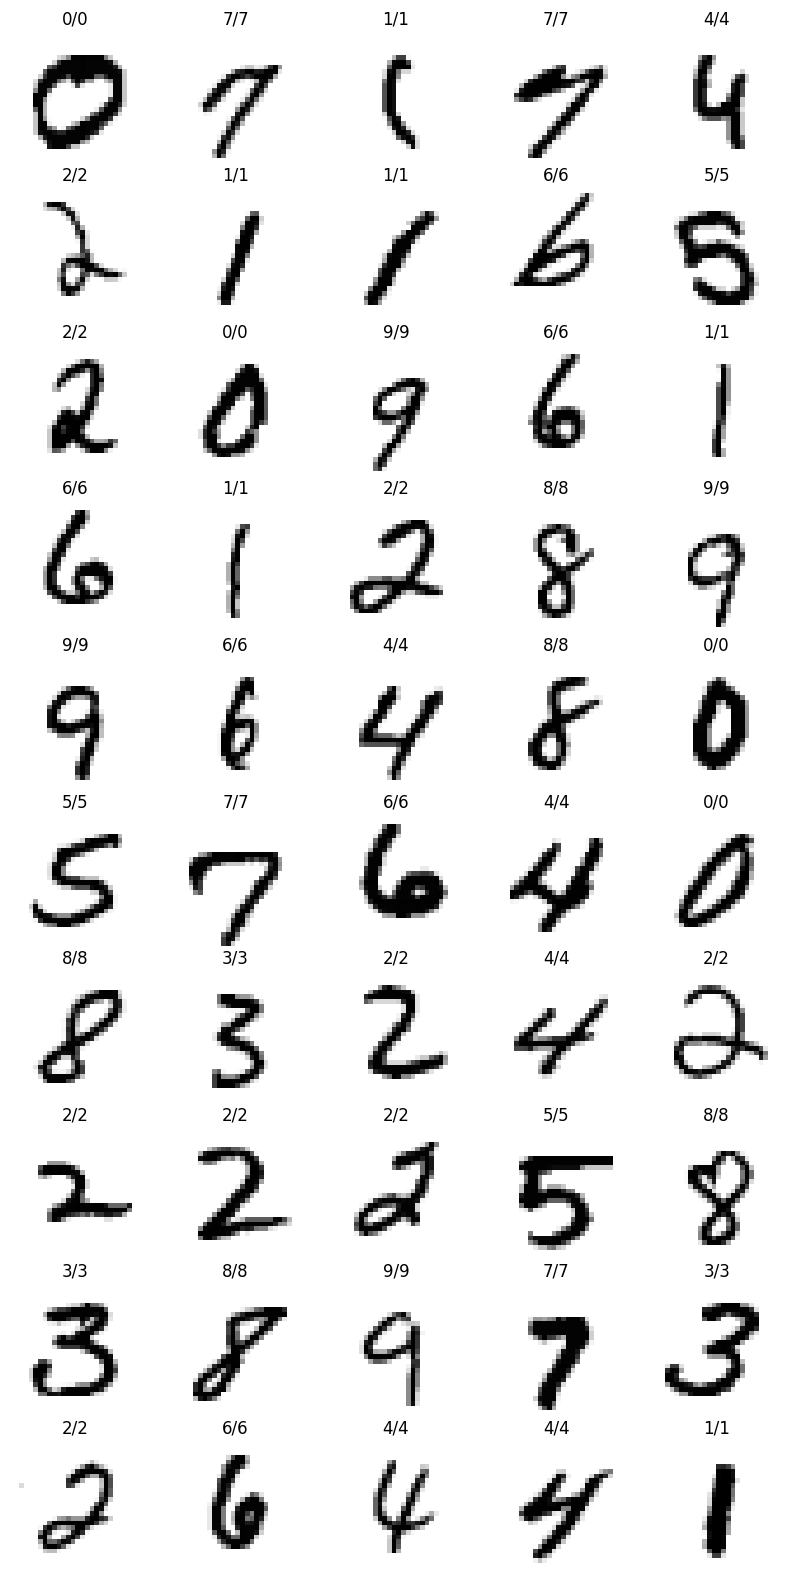

In [70]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5 * 2, 10 * 2))
for i in range(50):
    img = X_test[i].reshape(28, 28)
    axes = plt.subplot(10, 5, i + 1)
    axes.axis('off')
    axes.imshow(img, cmap='gray')
    axes.set_title(f'{y_pred[i]}/{y_test[i]}')

#### 3. 医疗健康

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 载入数据
data = pd.read_csv('data/cancer.csv', sep='\t')
data.head()
y = data.iloc[:, 1]
x = data.iloc[:, 2:]

# 归一化（数据缩放）
x = StandardScaler().fit_transform(x)
y = LabelEncoder().fit_transform(y)
print(x.shape, y.shape)  # (569, 30) (569,)

# # 数据拆分、模型训练
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1024)
grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [x for x in range(1, 30)],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=5,
    scoring='accuracy',
)

grid.fit(X_train, y_train)


(569, 30) (569,)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
y_pred = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'最佳模型：{grid.best_estimator_}')
print(f'最佳参数：{grid.best_params_}')
print(f'最佳分数：{grid.best_score_}')
print(f'预测值：{y_pred[:20]}')
print(f'真实值：{y_test[:20]}')
print(f'准确率：{score}')

最佳模型：KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')
最佳参数：{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
最佳分数：0.9714285714285715
预测值：[0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1]
真实值：[0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1]
准确率：0.956140350877193


In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 载入数据
data = pd.read_csv('data/cancer.csv', sep='\t')
data.head()
y = data.iloc[:, 1]
x = data.iloc[:, 2:]

# # 归一化（数据缩放）
# x = StandardScaler().fit_transform(x) # 转换为均值为 0，方差为 1 的标准正态分布
y = LabelEncoder().fit_transform(y)  # 将分类结果从字串类型，转为数值类型
# print(x.shape, y.shape)  # (569, 30) (569,)

# 数据拆分、模型训练
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1024)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [x for x in range(1, 30)],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=5,
    scoring='accuracy',
)

grid.fit(X_train, y_train)

# 模型预测、评估
y_pred = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'最佳模型：{grid.best_estimator_}')
print(f'最佳参数：{grid.best_params_}')
print(f'最佳分数：{grid.best_score_}')
print(f'预测值：{y_pred[:20]}')
print(f'真实值：{y_test[:20]}')
print(f'准确率：{score}')

最佳模型：KNeighborsClassifier(n_neighbors=3, p=1)
最佳参数：{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
最佳分数：0.9714285714285715
预测值：[0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1]
真实值：[0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1]
准确率：0.9649122807017544


#### 4. 人力资源

In [74]:
import pandas as pd

data = pd.read_csv('data/adults.txt')
# 剔除异常值: "?"
data.loc[:, "workclass"].unique()  # 发现有一个问号 "?"
data = data.replace("?", np.nan).dropna().reset_index(drop=True)  # 替换为nan，而后删除nan
print("剔除数据[?] 后形状:", data.shape)

# 剔除过高、过低的值
v1 = data.loc[:, "capital_loss"].sort_values(ascending=False).unique()
v2 = data.loc[:, "capital_gain"].sort_values(ascending=False).unique()
cond = ((data.loc[:, "capital_loss"] != 4356) & (data.loc[:, "capital_gain"] != 99999))
data = data.loc[cond, :]
print("剔除数据[股票]后形状:", data.shape)

# 字符串转数字
encoder = LabelEncoder()
columns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
data.head()
for c in columns:
    data.loc[:, c] = encoder.fit_transform(data.loc[:, c])
data.head()

# 归一化：抹平数字键的差异
scaler = StandardScaler()
col_norm = ['age', 'final_weight', 'workclass', 'education_num', 'education', 'marital_status', 'occupation',
            'relationship', 'race', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
data[col_norm] = scaler.fit_transform(data[col_norm])
data.head()

剔除数据[?] 后形状: (30162, 15)
剔除数据[股票]后形状: (30013, 15)


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0.045819,2.938218,-1.062426,-0.347916,1.137876,0.945119,-1.477141,-0.263809,0.385361,1,0.608849,-0.219201,-0.074089,0.265125,<=50K
1,0.883461,1.889835,-1.007584,-0.347916,1.137876,-0.388396,-0.732955,-0.888283,0.385361,1,-0.234401,-0.219201,-2.331824,0.265125,<=50K
2,-0.030330,-0.206931,0.244805,0.176136,-0.435526,-1.721910,-0.236830,-0.263809,0.385361,1,-0.234401,-0.219201,-0.074089,0.265125,<=50K
3,1.111909,-0.206931,0.425327,-2.444126,-1.222226,-0.388396,-0.236830,-0.888283,-2.009468,1,-0.234401,-0.219201,-0.074089,0.265125,<=50K
4,-0.791822,-0.206931,1.406607,-0.347916,1.137876,-0.388396,0.755419,2.234087,-2.009468,0,-0.234401,-0.219201,-0.074089,-5.299925,<=50K


### 线性回归
#### 解方程(1)

真实值: x=[2] b=[6]
求解值: [[2.01]
 [5.92]] (2, 1)


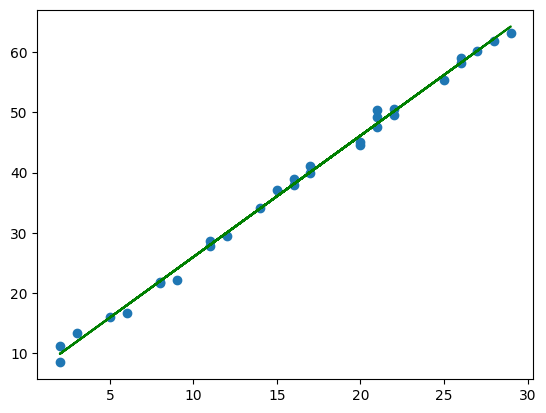

In [264]:
# y = wx + b 
import matplotlib.pylab as plt
import numpy as np

# 真实值
w = np.random.randint(1, 5, size=1)
b = np.random.randint(1, 10, size=1)
print(f'真实值: x={w} b={b}')

# 样本值
x = np.random.randint(1, 30, size=30).reshape(-1, 1)
y = w * x + b + np.random.randn(30, 1)
X = np.concatenate((x, np.full(shape=(30, 1), fill_value=1)), axis=1)  #  (100, 2)

# 求解
fn = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)
print(f'求解值: {fn}')  # 

# 可视化
axes = plt.subplot(111)
axes.scatter(x, y)
axes.plot(X[:, 0], X.dot(fn), color='green')

#### 解方程(2)

真实值: w=[3 6] b=[9]
[[2.9983907  5.99962946 9.0947026 ]]


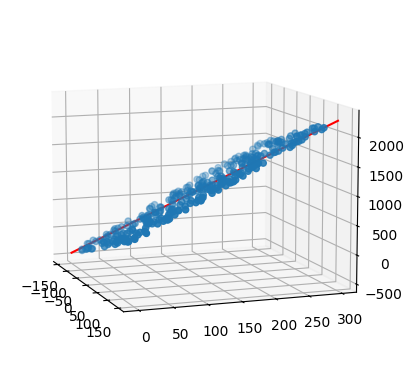

In [5]:
# y = w1 * x1 + w2*x2 + b 
import numpy as np
import matplotlib.pyplot as plt

# 真实值
w = np.random.randint(1, 10, size=2)
b = np.random.randint(1, 10, size=1)
print(f'真实值: w={w} b={b}')

# 样本数据
x1 = np.random.randint(-150, 150, size=(300, 1))
x2 = np.random.randint(0, 300, size=(300, 1))
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300, 1)

# 求解
X = np.concatenate((x1, x2, np.full(shape=(300, 1), fill_value=1)), axis=1)
fn = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(fn.T)

# 可视化
axes = plt.subplot(111, projection='3d')
axes.view_init(elev=10, azim=-20)  # 调整角度

axes.scatter(x1, x2, y)
t1 = np.linspace(-150, 150, 300)
t2 = np.linspace(0, 300, 300)
z = t1 * fn[0] + t2 * fn[1] + fn[2]
axes.plot(t1, t2, z, color='red')

#### sklearn 库

真实值: w=[4] b=[1]
回归计算，截距:[1.82536563] (1,)
回归计算，系数:[[3.88186841]] (1, 1)


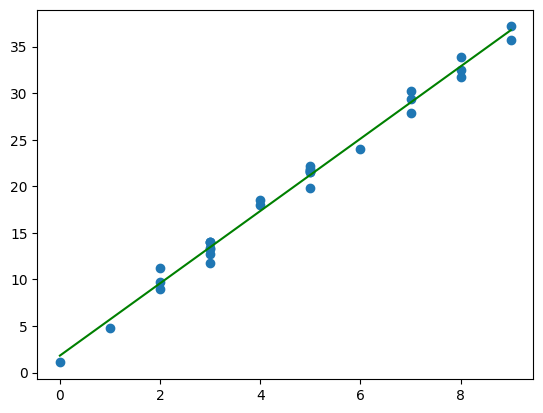

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 真实数据
w = np.random.randint(0, 10, size=1)
b = np.random.randint(0, 10, size=1)
print(f'真实值: w={w} b={b}')
# 构造样本
x = np.random.randint(0, 10, size=(30, 1))
y = x * w + b + np.random.randn(30, 1)

# 进行预测
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

print(f'回归计算，截距:{model.intercept_}', model.intercept_.shape)
print(f'回归计算，系数:{model.coef_}', model.coef_.shape)

# 绘图
axes = plt.subplot(111)
axes.scatter(x, y)
t = np.arange(0, 10)

y = t * model.coef_[0, 0] + model.intercept_[0]
axes.plot(t, y, color='green')

真实值: W=[4 2] b=[3]
回归计算，系数:[[4.00114429 1.99990952]] (1, 2)
回归计算，截距:[2.93092015] (1,)


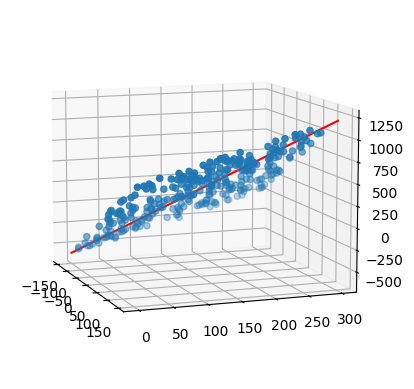

In [4]:
# y = w1*x + w2*x +b
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 真实值
w = np.random.randint(1, 5, size=2)
b = np.random.randint(1, 10, size=1)
print(f'真实值: W={w} b={b}')

# 构造样本矩阵
x1 = np.random.randint(-150, 150, size=(300, 1))
x2 = np.random.randint(0, 300, size=(300, 1))
Y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300, 1)
X = np.concatenate((x1, x2), axis=1)

# 线性回归                                         
model = LinearRegression(fit_intercept=True)
model.fit(X, Y)
print(f'回归计算，系数:{model.coef_}', model.coef_.shape)
print(f'回归计算，截距:{model.intercept_}', model.intercept_.shape)

# 绘制图形
axes = plt.subplot(111, projection='3d')
axes.view_init(elev=10, azim=-20)  # 调整视角
axes.scatter(x1, x2, Y)
x = np.linspace(-150, 150, 100)
y = np.linspace(0, 300, 100)
z = x * model.coef_[0, 0] + y * model.coef_[0, 1] + model.intercept_
axes.plot(x, y, z, color='red')

#### 波士顿房价(1)

In [40]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 数据
data = pd.read_csv('data/BostonHousing.csv')
# data = StandardScaler().fit_transform(data)
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 切分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 建模
grid = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid={
        'n_neighbors': [x for x in range(1, 15)],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
    },
    cv=5,
    scoring='neg_mean_squared_error',
)
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [42]:
# 交叉验证/训练结果
print(f'训练集的最佳模型: {grid.best_estimator_}')
print(f'训练集的最佳参数: {grid.best_params_}')  # 
print(f'训练集的最佳分数: {grid.best_score_}')  # 训练集中模型的准确率

# 执行预测
y_pred = grid.best_estimator_.predict(x_test)
score = mean_squared_error(y_test, y_pred)
print(f'测试集实际分数: {score}')
print(f'测试集预测值：{y_pred[:5]}')
print(f'测试集真实值：{y_test.T[:5]}')

训练集的最佳模型: KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')
训练集的最佳参数: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
训练集的最佳分数: -28.66384602830909
测试集实际分数: 38.42474689655154
测试集预测值：[20.12984278 32.15365009 24.65405823 12.51456567 21.06859947]
测试集真实值：329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: medv, dtype: float64


#### 波士顿房价(2)

In [35]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

data = pd.read_csv('data/BostonHousing.csv')
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression()

In [43]:
model.score(x_test, y_test)

0.5892223849182534

### 测试

> 项目实战编程题：使用 KNN 算法对wine葡萄酒数据集（sklearn 提供的数据集，from sklearn.datasets import load_wine）进行分类

In [72]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = datasets.load_wine(return_X_y=True)

# split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit_transform，针对的是训练接，计算训练集中的均值、标准差，用计算出来的均值、标准差对训练集进行标准化
# transform，针对的是测试集，根据训练集中算出的均值、标准差对测试集进行标准化
# 如果 StandardScaler().fit_transform(X) 这样会对整个数据（训练+测试）进行标准化，那么如果测试集包含极端值（较大值），则会影响训练集的计算（平均值、标准差）

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [x for x in range(1, 15)],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
    },
    cv=10,
    scoring='accuracy',
)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [73]:
# 模型预测
print(f"最优参数: {grid.best_params_}")
print(f"最佳分数：{grid.best_score_}")
print(f"最佳模型：{grid.best_estimator_}")

# 预测
y_pred = grid.best_estimator_.predict(x_test)
print(f"预测结果: {y_pred[:10]}")
print(f"实际结果: {y_test[:10]}")

v = accuracy_score(y_test, y_pred)
print(v)

# 模型评估
score = accuracy_score(y_test, y_pred)
print(f"准确率：{score}")

最优参数: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
最佳分数：0.9857142857142858
最佳模型：KNeighborsClassifier(n_neighbors=11, p=1)
预测结果: [0 0 2 0 1 0 1 2 1 2]
实际结果: [0 0 2 0 1 0 1 2 1 2]
0.9444444444444444
准确率：0.9444444444444444


In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess data using StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier with different k values
k_values = [3, 5, 7, 9]
best_k = 0
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}, with accuracy: {best_accuracy:.4f}")

Accuracy for k=3: 0.9630
Accuracy for k=5: 0.9630
Accuracy for k=7: 0.9815
Accuracy for k=9: 0.9815
Best k value: 7, with accuracy: 0.9815


#### 医疗案例

(442, 10) (442,)
线性系数: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
线性截距: 151.34560453985995
均方误差：2900.1936284934804
真实值：[219.  70. 202. 230. 111.]
预测值: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]


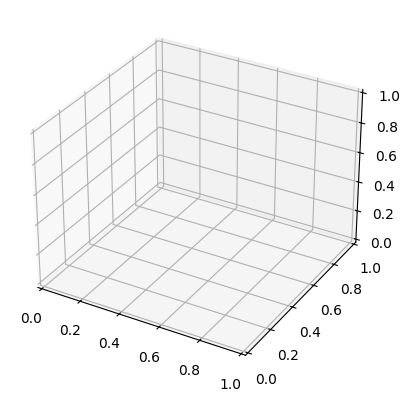

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt

X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'线性系数: {model.coef_}')
print(f'线性截距: {model.intercept_}')
score = mean_squared_error(y_test, y_pred)
print(f'均方误差：{score}')
print(f'真实值：{y_test[:5]}')
print(f'预测值: {y_pred[:5]}')




In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 加载糖尿病数据集
diabetes = load_diabetes()

# 特征工程：将所有特征进行标准化处理
X = diabetes.data
y = diabetes.target
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# 创建 LinearRegression 对象并拟合模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 预测测试集数据
y_pred = lr.predict(X_test)

# 计算均方误差和决定系数
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出均方误差和可决系数
print("均方误差：", mse)
print("决定系数：", r2)
print(f'真实值：{y_test[:5]}')
print(f'预测值: {y_pred[:5]}')

均方误差： 2900.1936284934827
决定系数： 0.45260276297191926
真实值：[219.  70. 202. 230. 111.]
预测值: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]


### 波士顿房价预测

In [17]:
y_pred = grid.predict(X_test)
score = grid.score(X_test, y_test)
print(score)

-22.21941270492235


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.725963092503344